In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from numpy import array, ndarray
from pandas import read_csv, DataFrame, Series
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from dslabs_functions import CLASS_EVAL_METRICS, DELTA_IMPROVE, plot_bar_chart, read_train_test_from_files, plot_multibar_chart, evaluate_approach
from sklearn.model_selection import train_test_split


# Load split dataset

In [2]:
target = "CovidPos"
file_tag = "pos_covid_evaluation_NB"
eval_metric = "accuracy"

train: DataFrame = read_csv("datasets/class_pos_covid_train.csv", index_col="Unnamed: 0", na_values=None)
test: DataFrame = read_csv("datasets/class_pos_covid_test.csv", index_col="Unnamed: 0", na_values=None)

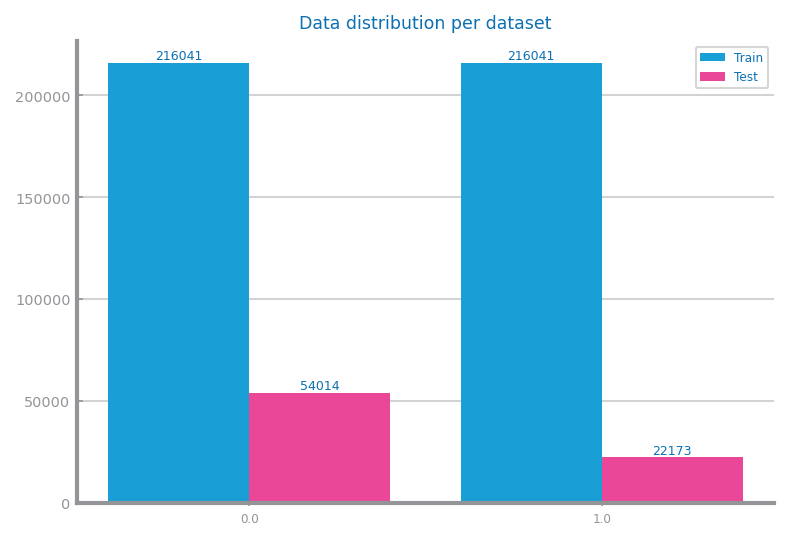

In [3]:
positive: int = 1
negative: int = 0
values: dict[str, list[int]] = {}

values["Train"] = [
    len(train[train[target] == negative]),
    len(train[train[target] == positive]),
]
values["Test"] = [
    len(test[test[target] == negative]),
    len(test[test[target] == positive]),
]

labels: list = list(train[target].unique())
labels.sort()

plt.figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
plt.show()

# Study

In [4]:
trnX = train.copy(deep=True)
trnY = trnX[target]
trnX = trnX.drop(target, axis=1)

tstX = test.copy(deep=True)
tstY = tstX[target]
tstX = tstX.drop(target, axis=1)

In [5]:
def naive_Bayes_study(
    trnX: ndarray, trnY: array, tstX: ndarray, tstY: array, metric: str = "accuracy", hyperparams: dict = { "GaussianNB": {}, "MultinomialNB": {}, "BernoulliNB": {} }
) -> tuple:
    estimators: dict = {
        "GaussianNB": GaussianNB(**hyperparams["GaussianNB"]),
        "MultinomialNB": MultinomialNB(**hyperparams["MultinomialNB"]),
        "BernoulliNB": BernoulliNB(**hyperparams["BernoulliNB"]),
    }

    xvalues: list = []
    yvalues: list = []
    best_model = None
    best_params: dict = {"name": "", "metric": metric, "params": ()}
    best_performance = 0
    for clf in estimators:
        xvalues.append(clf)
        estimators[clf].fit(trnX, trnY)
        prdY: array = estimators[clf].predict(tstX)
        eval: float = CLASS_EVAL_METRICS[metric](tstY, prdY)
        if eval - best_performance > DELTA_IMPROVE:
            best_performance: float = eval
            best_params["name"] = clf
            best_params[metric] = eval
            best_params["params"] = hyperparams[clf]
            best_model = estimators[clf]
        yvalues.append(eval)
        # print(f'NB {clf}')
    plot_bar_chart(
        xvalues,
        yvalues,
        title=f"Naive Bayes Models ({metric})",
        ylabel=metric,
        percentage=True,
    )

    return best_model, best_params

## Default Hyperparams

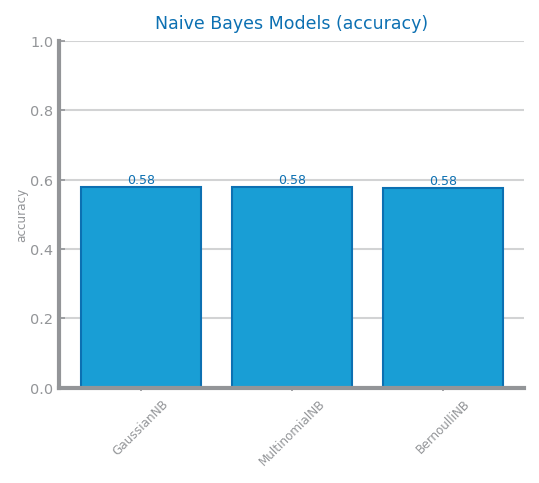

In [6]:
eval_metric = "accuracy"

plt.figure()
best_model_acc_1, params_acc_1 = naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric)
plt.savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
plt.show()

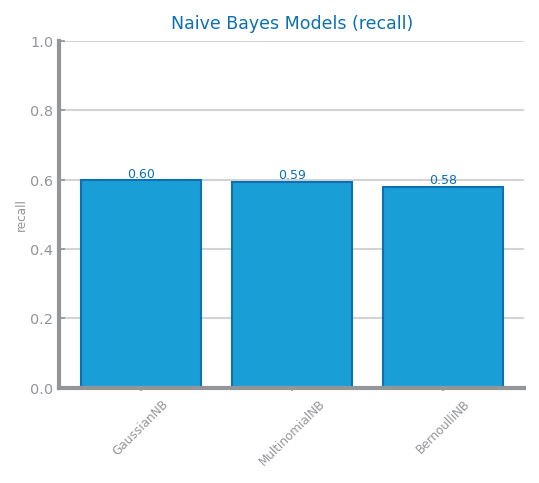

In [7]:
eval_metric = "recall"

plt.figure()
best_model_recall_1, params_recall_1 = naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric)
plt.savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
plt.show()

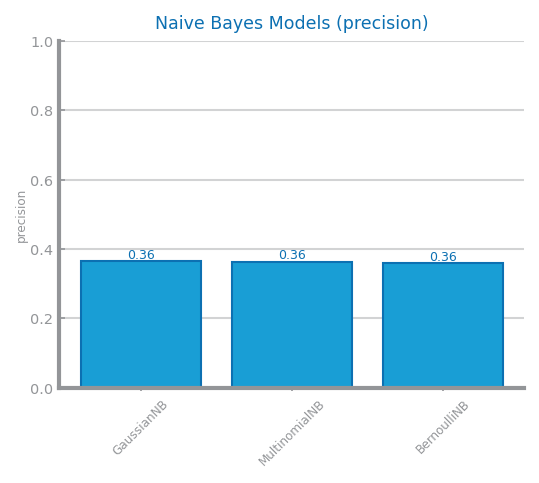

In [8]:
eval_metric = "precision"

plt.figure()
best_model_prec_1, params_prec_1 = naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric)
plt.savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
plt.show()

## Hyperparams 1

In [9]:
hyperparams = { "GaussianNB": {}, "MultinomialNB": {"alpha":0.1746}, "BernoulliNB": {} }
file_tag = "pos_covid_evaluation_NB_non_default_hyperparams"

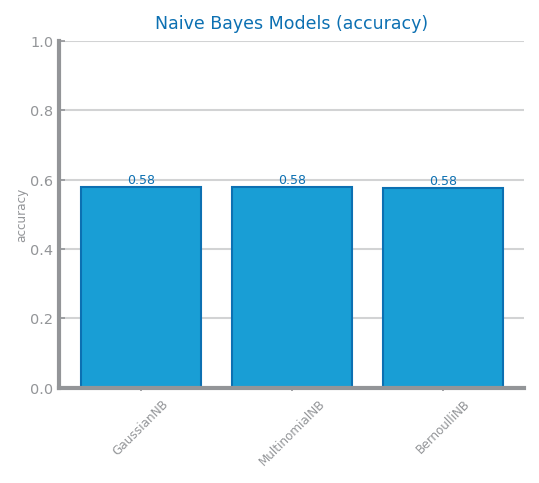

In [10]:
eval_metric = "accuracy"

plt.figure()
best_model_acc_2, params_acc_2 = naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric, hyperparams)
plt.savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
plt.show()

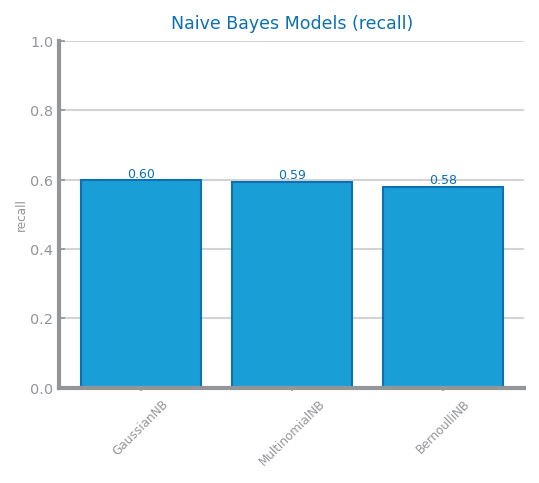

In [11]:
eval_metric = "recall"

plt.figure()
best_model_recall_2, params_recall_2 = naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric, hyperparams)
plt.savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
plt.show()

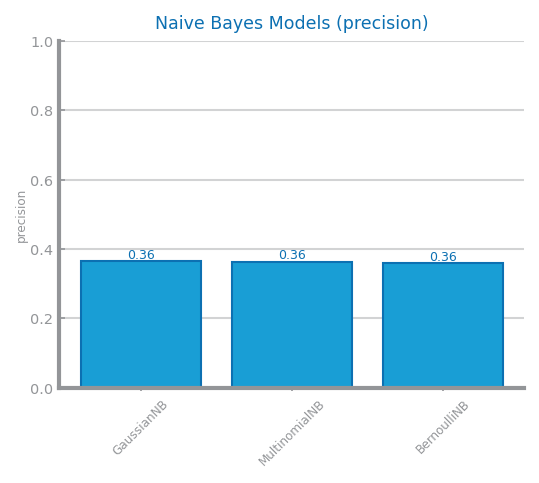

In [12]:
eval_metric = "precision"

plt.figure()
best_model_prec_2, params_prec_2 = naive_Bayes_study(trnX, trnY, tstX, tstY, eval_metric, hyperparams)
plt.savefig(f"images/{file_tag}_nb_{eval_metric}_study.png")
plt.show()

# Performance Analysis

chosen recall because optimizing with accuracy vs recall doesnt change much, and since this is medical predictions is best to maximize recall score

<Figure size 600x450 with 0 Axes>

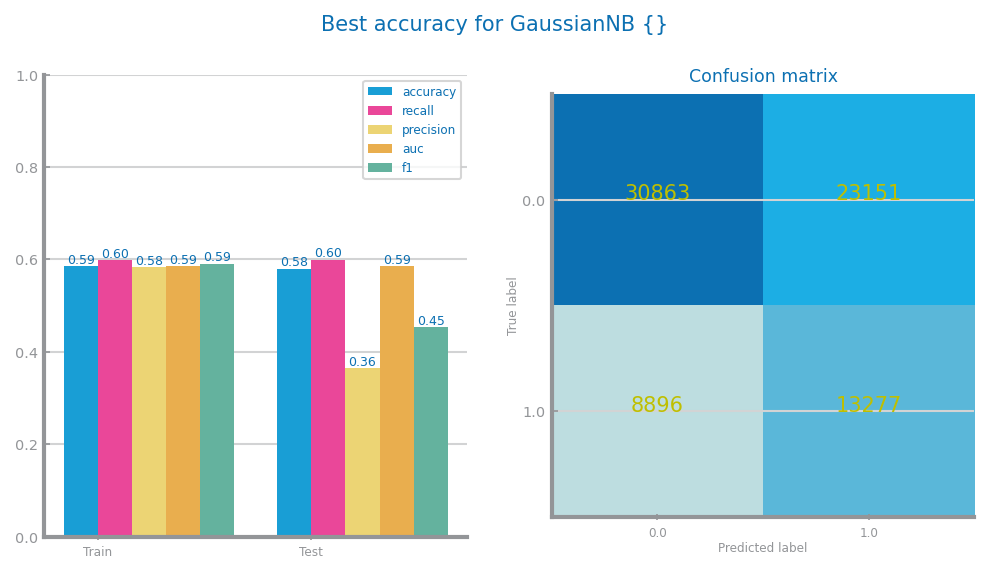

In [13]:
from dslabs_functions import plot_evaluation_results

best_model = best_model_acc_1
best_params = params_acc_1

prd_trn: array = best_model.predict(trnX)
prd_tst: array = best_model.predict(tstX)
plt.figure()
plot_evaluation_results(best_params, trnY, prd_trn, tstY, prd_tst, labels)
plt.savefig(f'images/{file_tag}_{best_params["name"]}_best_{best_params["metric"]}_eval.png')
plt.show()